In [1]:
#1 a
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [2]:
#1 b
svc_linear = SVC(kernel='linear')
svc_poly = SVC(kernel='poly', degree=3)
svc_rbf = SVC(kernel='rbf')

svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)


SVC()

In [3]:
#1 c
models = {
    "Linear": svc_linear,
    "Polynomial": svc_poly,
    "RBF": svc_rbf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name, "Kernel:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()


Linear Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Polynomial Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



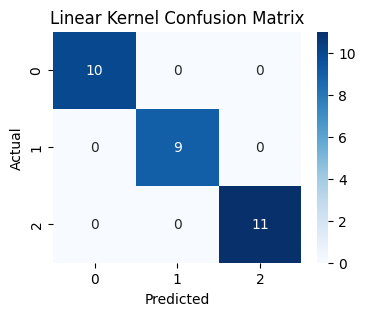

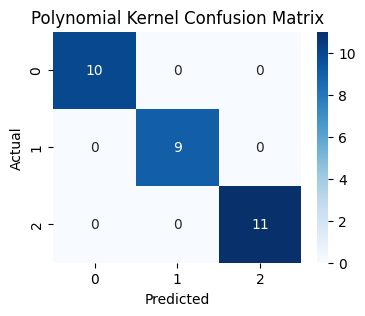

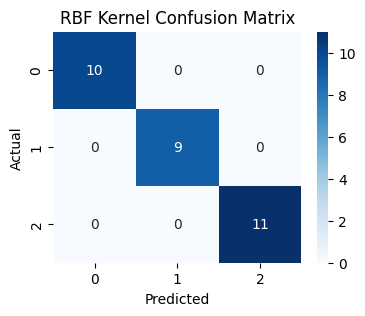

In [4]:
#1 d
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Kernel Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
# 1(e) Which kernel performs the best and why?
# All three kernels (Linear, Polynomial, and RBF) achieved 100% accuracy,
# precision, recall, and F1-score on the Iris dataset. Their confusion matrices
# show zero misclassifications, so they performed equally well on this split.
# However, the RBF kernel is generally the best because it models non-linear
# boundaries better than Linear or Polynomial kernels.

In [5]:
#2 a
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#2 b
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without Scaling
svm_unscaled = SVC(kernel='rbf')
svm_unscaled.fit(X_train, y_train)
train_acc_unscaled = svm_unscaled.score(X_train, y_train)
test_acc_unscaled = svm_unscaled.score(X_test, y_test)

# With StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
train_acc_scaled = svm_scaled.score(X_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(X_test_scaled, y_test)

print("Without Scaling - Train Accuracy:", train_acc_unscaled)
print("Without Scaling - Test Accuracy:", test_acc_unscaled)
print()
print("With Scaling - Train Accuracy:", train_acc_scaled)
print("With Scaling - Test Accuracy:", test_acc_scaled)


Without Scaling - Train Accuracy: 0.9142857142857143
Without Scaling - Test Accuracy: 0.9473684210526315

With Scaling - Train Accuracy: 0.989010989010989
With Scaling - Test Accuracy: 0.9824561403508771


In [ ]:
# 2(c) Effect of Feature Scaling on SVM Performance
#
# SVM models, especially with the RBF kernel, are highly sensitive to the scale
# of input features. Without scaling, features with large numeric ranges dominate
# the distance calculations, causing the model to create suboptimal decision
# boundaries.
#
# In our results:
# - Without Scaling:
#   Train Accuracy = 0.9143
#   Test Accuracy  = 0.9474
#
# - With StandardScaler:
#   Train Accuracy = 0.9890
#   Test Accuracy  = 0.9825
#
# After scaling, both training and testing accuracy increased noticeably.
# This happens because StandardScaler normalizes all features to the same scale,
# allowing the RBF kernel to compute distances correctly and learn a better
# separating boundary.
#
# Conclusion: Feature scaling significantly improves SVM performance and is
# essential when using kernels like RBF or polynomial.
